### Lab 6 - Return of the Exoplanets!
#### Authors: Chandra Adhikari and Naomi Hoffman

### Re-use code from Lab 2

In [1]:
# Python â‰¥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn â‰¥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
# rc means runtime configuration
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [2]:
import pandas as pd
DOWNLOAD_ROOT = "cumulative.csv"

raw_data = pd.read_csv (DOWNLOAD_ROOT)
#print (df.head)

In [3]:
raw_data["koi_disposition"].value_counts()

FALSE POSITIVE    5023
CONFIRMED         2293
CANDIDATE         2248
Name: koi_disposition, dtype: int64

In [4]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(raw_data, raw_data["koi_disposition"]):
    strat_train_set = raw_data.loc[train_index]
    strat_test_set = raw_data.loc[test_index]

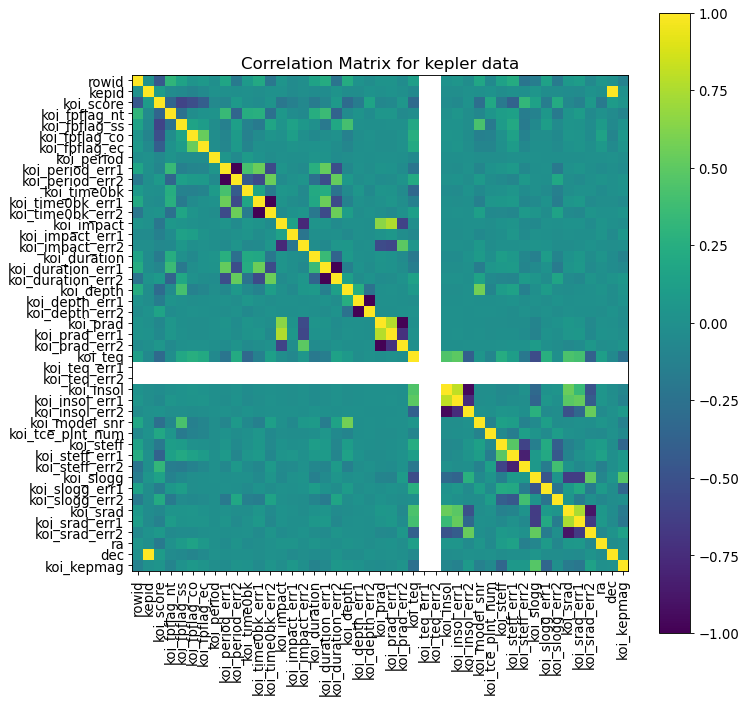

In [5]:
def visualize_correlation(data):
    corr_matrix = data.corr()
    plt.figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
    corr_plot = plt.matshow(corr_matrix, fignum = 1)
    plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
    plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corr_plot)
    plt.title(f'Correlation Matrix for kepler data', fontsize=15)
    plt.show()
    
visualize_correlation(strat_train_set)

In [6]:
def drop_unnecessary_col(data):
    to_drop=["koi_pdisposition","kepid", "kepler_name", "kepoi_name","koi_tce_plnt_num", "koi_tce_delivname"]
    cols = data.columns
    for c in cols: # Thanks kirktobridge (on Kaggle) for this nice way of dropping error categories :)
        if 'err' in c:
            to_drop.append(c)
        if 'fpflag' in c:
            to_drop.append(c)
    updated_data = data.drop(to_drop, axis = 1)
    print("Dropped:\n\n", to_drop)
    print(f"\nYour dataset had {data.shape[1]} columns.\nIt now has {updated_data.shape[1]} columns.")
    return updated_data

In [7]:
strat_train_set=drop_unnecessary_col(strat_train_set)
strat_test_set=drop_unnecessary_col(strat_test_set)

Dropped:

 ['koi_pdisposition', 'kepid', 'kepler_name', 'kepoi_name', 'koi_tce_plnt_num', 'koi_tce_delivname', 'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec', 'koi_period_err1', 'koi_period_err2', 'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_impact_err1', 'koi_impact_err2', 'koi_duration_err1', 'koi_duration_err2', 'koi_depth_err1', 'koi_depth_err2', 'koi_prad_err1', 'koi_prad_err2', 'koi_teq_err1', 'koi_teq_err2', 'koi_insol_err1', 'koi_insol_err2', 'koi_steff_err1', 'koi_steff_err2', 'koi_slogg_err1', 'koi_slogg_err2', 'koi_srad_err1', 'koi_srad_err2']

Your dataset had 50 columns.
It now has 18 columns.
Dropped:

 ['koi_pdisposition', 'kepid', 'kepler_name', 'kepoi_name', 'koi_tce_plnt_num', 'koi_tce_delivname', 'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec', 'koi_period_err1', 'koi_period_err2', 'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_impact_err1', 'koi_impact_err2', 'koi_duration_err1', 'koi_duration_err2', 'koi_depth_err1', 'koi_depth_

In [8]:
#drop koi_Score as we're not allowed to use it
def drop_forbidden_col(data):
    data=data.drop(["koi_score"], axis=1)
    return data

In [9]:
strat_train_set = drop_forbidden_col(strat_train_set)
strat_test_set = drop_forbidden_col(strat_test_set)

In [10]:
def drop_missing_data(missing_data):
    data = missing_data.dropna()
    print(f"The dataset had {missing_data.shape[0]} rows. It now has {data.shape[0]} rows.\n({missing_data.shape[0]-data.shape[0]} rows were dropped, leaving you with {round(((data.shape[0]/missing_data.shape[0])*100),2)}% of the original number of entries.)")
    return data

In [11]:
strat_train_set = drop_missing_data(strat_train_set)
strat_test_set = drop_missing_data(strat_test_set)

The dataset had 7651 rows. It now has 7351 rows.
(300 rows were dropped, leaving you with 96.08% of the original number of entries.)
The dataset had 1913 rows. It now has 1849 rows.
(64 rows were dropped, leaving you with 96.65% of the original number of entries.)


In [12]:
strat_train_set.describe()

,rowid,koi_period,koi_time0bk,koi_impact,koi_duration,koi_depth,koi_prad,koi_teq,koi_insol,koi_model_snr,koi_steff,koi_slogg,koi_srad,ra,dec,koi_kepmag
count,7351.000000,7351.000000,7351.000000,7351.000000,7351.000000,7.351000e+03,7351.000000,7351.000000,7.351000e+03,7351.000000,7351.000000,7351.000000,7351.000000,7351.000000,7351.000000,7351.000000
mean,4706.051966,77.441472,165.244805,0.737878,5.572146,2.385222e+04,107.279589,1089.329615,6.994431e+03,259.489552,5708.241736,4.309570,1.740445,292.065058,43.786990,14.268683
std,2772.612046,1520.897717,67.795164,3.321413,6.348571,8.325354e+04,3315.601789,853.439552,1.202486e+05,788.310636,795.392454,0.435459,6.147272,4.779253,3.588521,1.385737
min,1.000000,0.241843,120.515914,0.000000,0.104600,1.700000e+00,0.080000,25.000000,0.000000e+00,0.800000,2661.000000,0.047000,0.116000,279.852720,36.577381,6.966000
25%,2298.500000,2.648663,132.749990,0.197000,2.437000,1.613500e+02,1.410000,544.000000,2.073500e+01,12.000000,5307.000000,4.218500,0.828000,288.660770,40.768711,13.439500
50%,4622.000000,9.078292,136.943240,0.538100,3.807000,4.267000e+02,2.420000,886.000000,1.455100e+02,23.300000,5764.000000,4.438000,0.999000,292.268130,43.665630,14.525000
75%,7151.500000,36.159827,170.189323,0.888000,6.225950,1.499300e+03,15.470000,1386.500000,8.743400e+02,76.850000,6109.000000,4.544000,1.345000,295.884795,46.671351,15.327000
max,9563.000000,129995.778400,1472.522306,100.196000,117.520000,1.541400e+06,200346.000000,13184.000000,7.165673e+06,9054.700000,15896.000000,5.283000,229.908000,301.720760,52.336010,19.485000


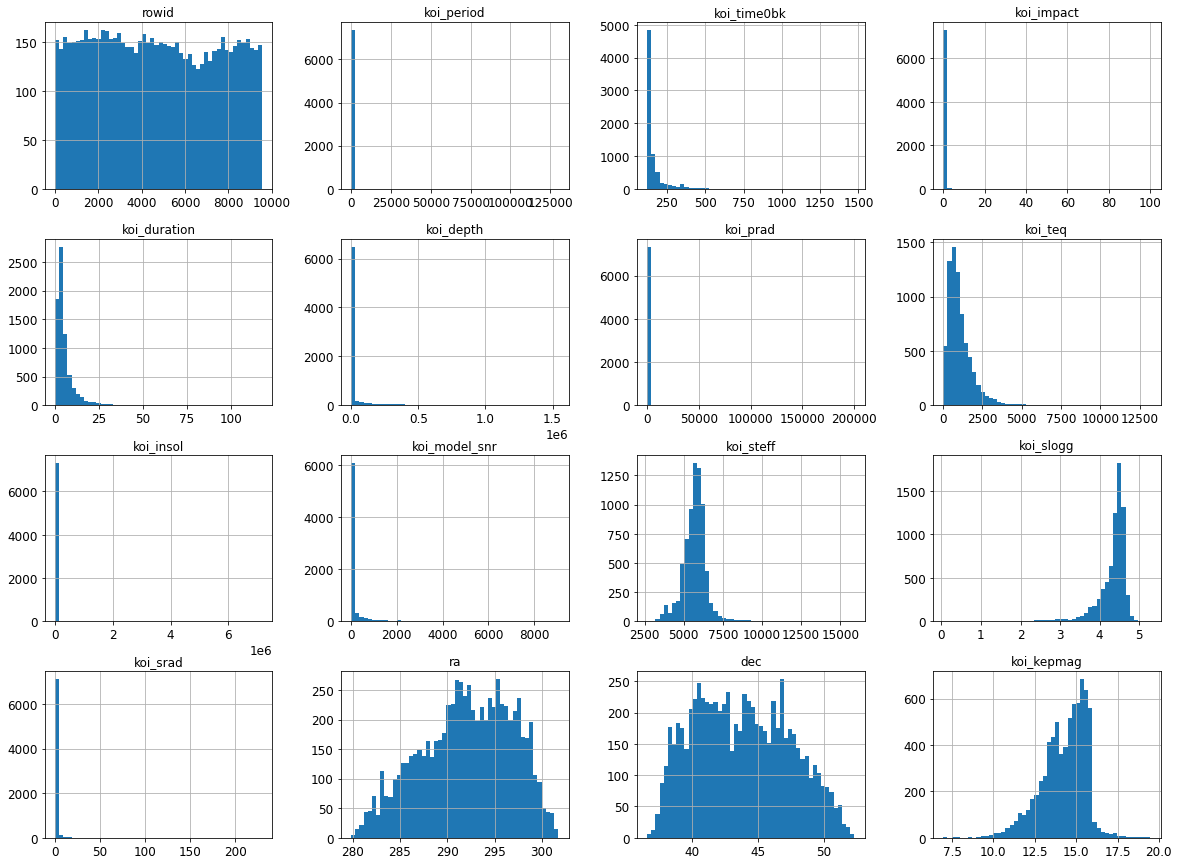

In [13]:
%matplotlib inline
# only in a Jupyter notebook
import matplotlib.pyplot as plt
strat_train_set.hist(bins=50, figsize=(20,15))
plt.show()

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

#('attribs_adder', CombinedAttributesAdder()),
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler()),    
])


In [15]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

strat_num = list(strat_train_set.drop("koi_disposition", axis=1))
strat_cat = ["koi_disposition"]

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, strat_num)
])
#("cat", OneHotEncoder(), strat_cat),    



In [16]:
from sklearn.model_selection import train_test_split

X_training_data = full_pipeline.fit_transform(strat_train_set)
y_training_data = (strat_train_set["koi_disposition"] == "CONFIRMED")

x_train, x_val, y_train, y_val = train_test_split(X_training_data, y_training_data, test_size=0.12, shuffle=False)

X_test = strat_test_set.drop("koi_disposition", axis=1)
y_test = (strat_test_set["koi_disposition"] == "CONFIRMED")

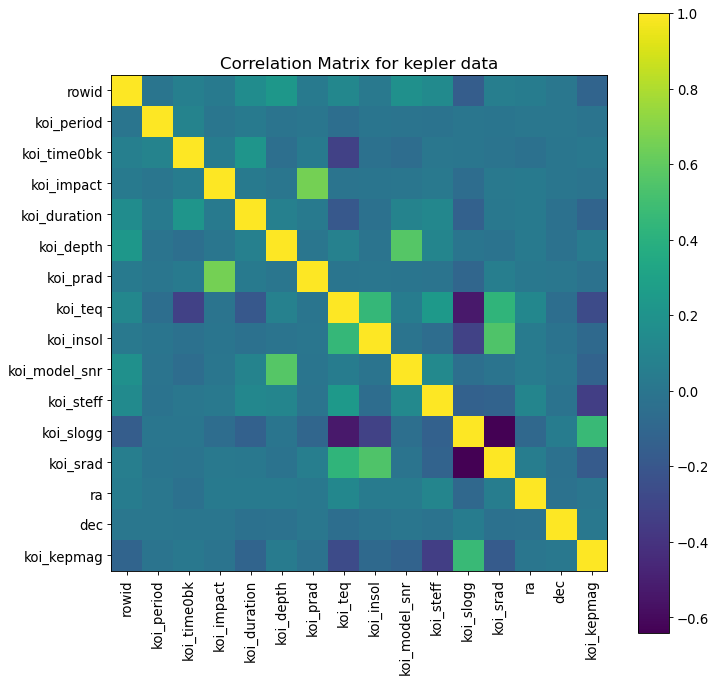

In [17]:
visualize_correlation(strat_train_set)

### Add Neural Network stuff!

10. Train a deep MLP on the MNIST dataset and see if you can get over 98% preci‐
sion. Try adding all the bells and whistles (i.e., save checkpoints, use early stop‐
ping, plot learning curves using TensorBoard, and so on)

In [18]:
import tensorflow as tf
from tensorflow import keras

ModuleNotFoundError: No module named 'tensorflow'

### Progress Notes
#### Problems
#### Investigations